# SVM

In [23]:
library(e1071)

## Support Vector Classifier

x.1,x.2,y
-0.6264538,0.91897737,-1
0.1836433,0.78213630,-1
-0.8356286,0.07456498,-1
1.5952808,-1.98935170,-1
0.3295078,0.61982575,-1
-0.8204684,-0.05612874,-1
0.4874291,-0.15579551,-1
0.7383247,-1.47075238,-1
0.5757814,-0.47815006,-1
-0.3053884,0.41794156,-1


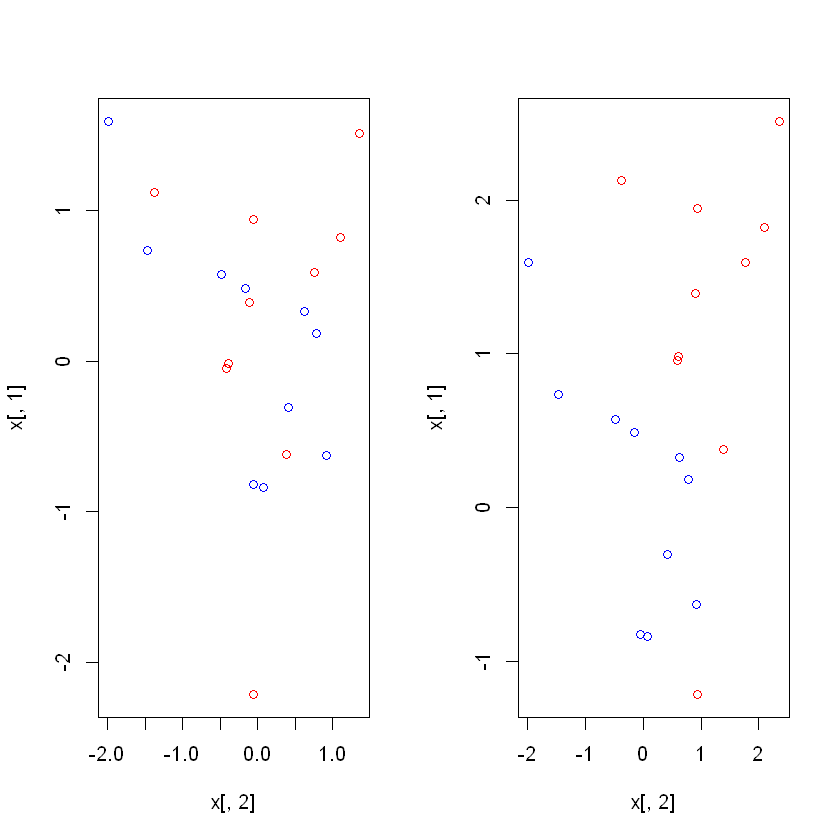

In [13]:
par(mfrow=c(1,2))
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10)) # y column having first 10 elements -1 ; next 10 elements 1
plot(x[,2],x[,1],col=(3-y)) # col will decide the color of pts.
#x

x[y==1,]=x[y==1,]+1
plot(x[,2],x[,1],col=(3-y))
dat = data.frame(x=x,y=as.factor(y))
dat

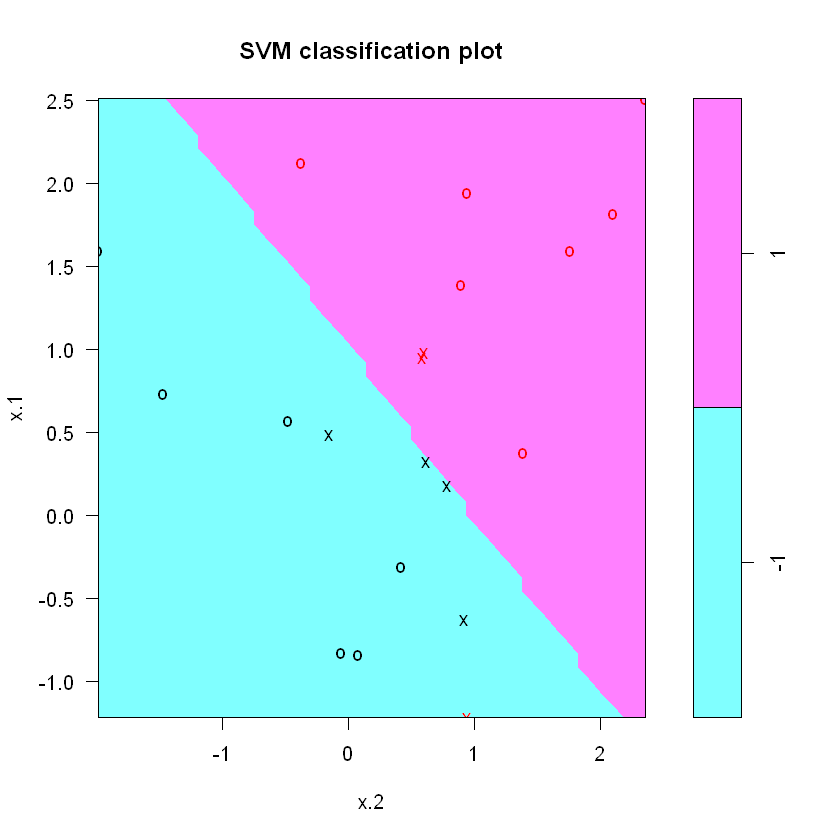

In [15]:
svmfit=svm(y~., data=dat, kernel = "linear", cost =10, scale = FALSE) # cost = 10
plot(svmfit, dat)
# cross represents the support vectors

In [16]:
svmfit$index # identifies the support vectors

[1]  1  2  5  7 14 16 17

In [18]:
summary(svmfit)
# gamma = 1/(number of X values) ; here 1/2 ; gamma is important in radial kernal


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




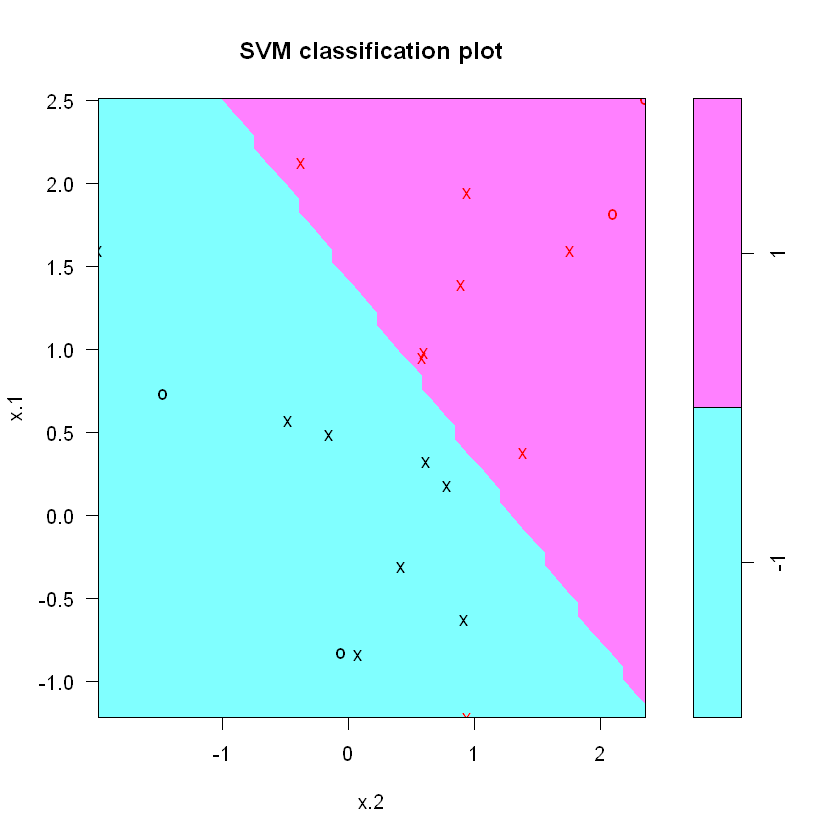

In [20]:
svmfit=svm(y~., data=dat, kernel = "linear", cost =0.1, scale = FALSE) # cost = 0.1
plot(svmfit, dat)
# cross represents the support vectors ; margin is increased
# low cost results in large margins and 16 support points

In [21]:
set.seed(1)
tune.out = tune(svm, y~., data=dat, kernal="linear", ranges=list(cost=c(0.001,0.01,0.1,1,5,10,100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.65  0.4743416
2 1e-02  0.65  0.4743416
3 1e-01  0.65  0.4743416
4 1e+00  0.15  0.2415229
5 5e+00  0.10  0.2108185
6 1e+01  0.10  0.2108185
7 1e+02  0.10  0.2108185


In [22]:
# best model is corrosponding to cost
# best performance is error of the model
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernal = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  5 
      gamma:  0.5 

Number of Support Vectors:  9

 ( 5 4 )


Number of Classes:  2 

Levels: 
 -1 1




       truth
predict -1  1
     -1  7  1
     1   2 10

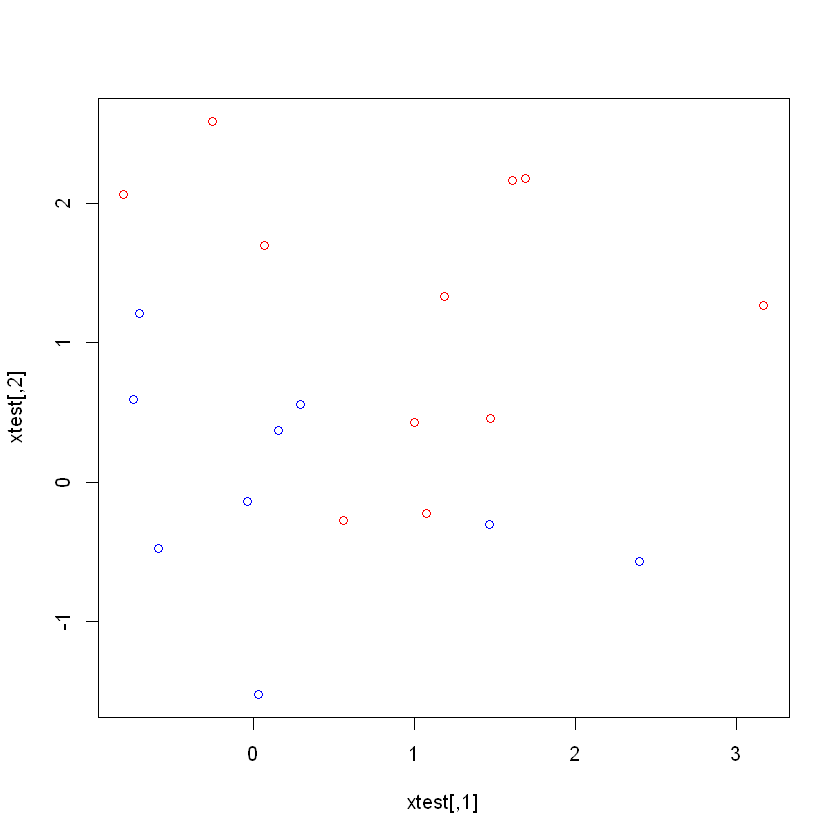

In [25]:
xtest = matrix(rnorm(20*2), ncol=2)
ytest = sample(c(-1,1),20,rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,]+1
testdat=data.frame(x=xtest, y=as.factor(ytest))
plot(xtest, col = (3-ytest))
# predict class lable of the test observation using best model
ypred=predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

In [28]:
# cost =0.01, no of support vector should increase
svmfit=svm(y~., data=dat, kernel = "linear", cost =0.01, scale = FALSE) # cost = 0.01
ypred = predict(svmfit, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 6
     1   0 5

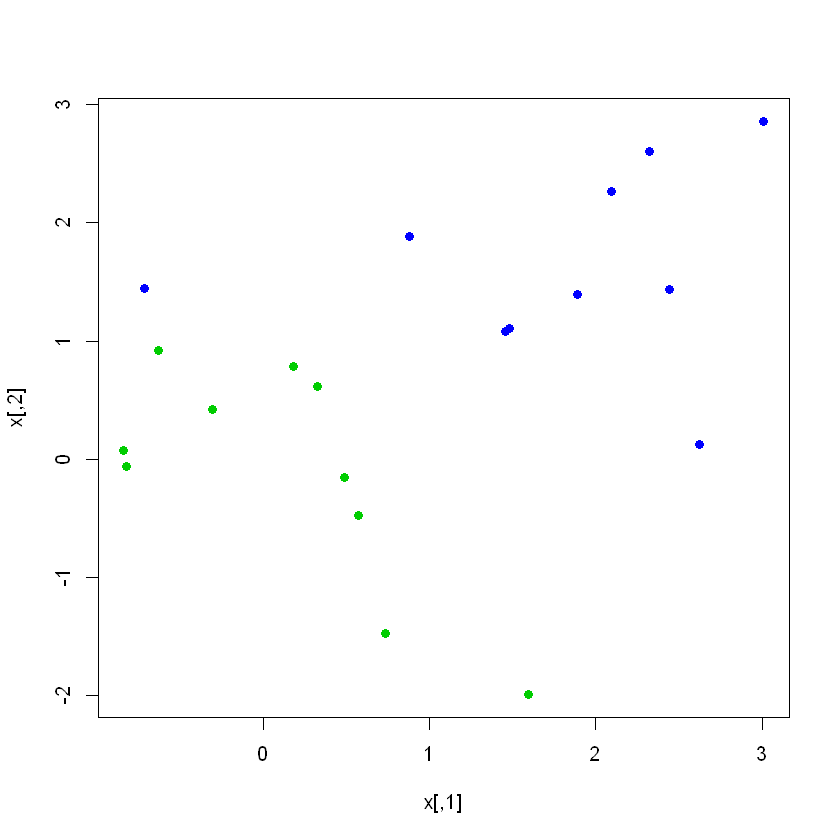

In [29]:
# two classes linearly separable
x[y==1,]=x[y==1,]+0.5
plot(x, col = (y+5)/2+1, pch=19)
par(mfrow = c(1,1))


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




[1]  2 14 15

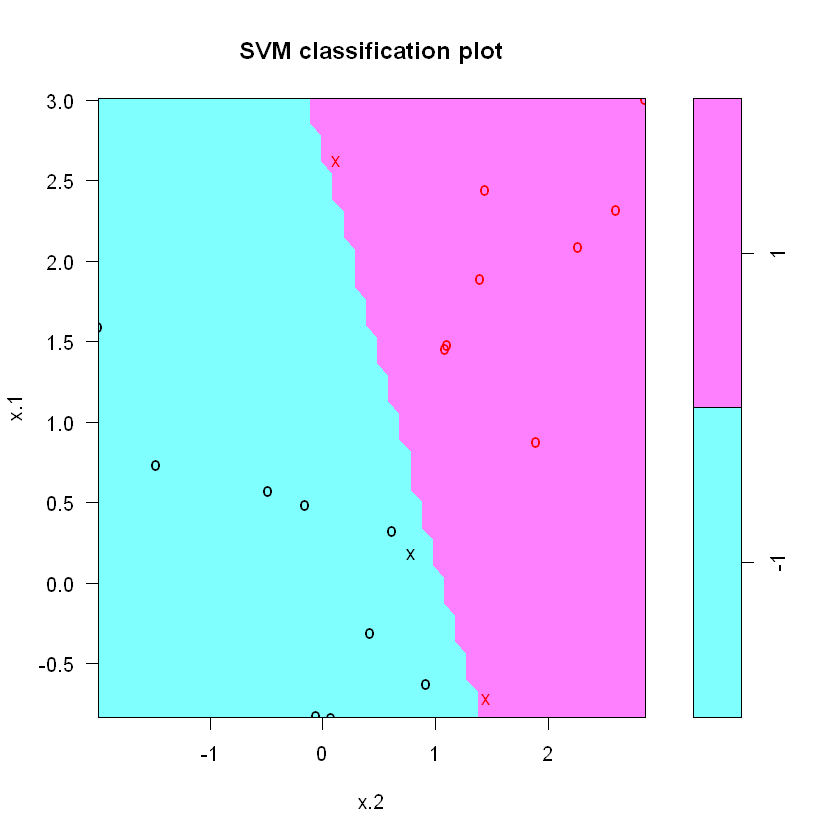

In [31]:
# fit svm with high cost so that no observation is missclassified
dat = data.frame(x=x, y=as.factor(y))
svmfit=svm(y~.,data=dat, kernel = "linear", cost = 1e5)
summary(svmfit)
plot(svmfit, dat)
svmfit$index

In [32]:
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 3
     1   0 8